<a href="https://colab.research.google.com/github/shailavij/Keras-Functional-API-Projects/blob/master/Sequence_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.2.0
GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [0]:
# Import imdb
import tensorflow.keras.datasets.imdb as imdb


In [0]:
# Download and assign the data set using load_data()

(x_train,y_train),(x_test,y_test)=imdb.load_data()

#### Inspect the dataset

In [0]:
# Inspect the type of the data

type(x_train)

In [0]:
# Inspect the shape of the data

x_train.shape

In [0]:
# Display the first dataset element input
# Notice encoding
x_train[0]


In [0]:
# Display the first dataset element output

y_train[0]


#### Load dataset with different options

In [0]:
# Load the dataset with defaults
imdb.load_data(path='imdb.npz',index_from=3)

# ~/.keras/dataset/

In [0]:
# Limit the vocabulary to the top 500 words using num_words
imdb.load_data(num_words=1000)


In [0]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10,num_words=1000,oov_char=2)

In [0]:
# Limit the sequence lengths to 500 using maxlen



In [0]:
 # Use '1' as the character that indicates the start of a sequence

 

#### Explore the dataset word index

In [0]:
# Load the imdb word index using get_word_index()



In [0]:
# View the word index as a dictionary,
# accounting for index_from.



In [0]:
# Retrieve a specific word's index



In [0]:
# View an input sentence



In [0]:
# Get the sentiment value



---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [0]:
# Load the imdb data set



#### Preprocess the data with padding

In [0]:
# Inspect the input data shape



In [0]:
# Pad the inputs to the maximum length using maxlen



In [0]:
# Inspect the output data shape



#### Create a Masking layer

In [0]:
# Import numpy 



In [0]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims



In [0]:
# Create a Masking layer 



In [0]:
# Pass tf_x_train to it



In [0]:
# Look at the dataset



In [0]:
# Look at the ._keras_mask for the dataset



***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [0]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length
embedding_layer= tf.keras.layers.Embedding(input_dim=501,output_dim=12)


In [0]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)
seq_of_indices= tf.constant([[[0], [1],[5],[500]]])
seq_of_emmedding= embedding_layer(seq_of_indices)
seq_of_emmedding


<tf.Tensor: shape=(1, 4, 1, 12), dtype=float32, numpy=
array([[[[ 0.01912295,  0.01220428, -0.02703236, -0.0384903 ,
          -0.00795363,  0.00937154, -0.02388804,  0.03286494,
           0.0042765 ,  0.01916081, -0.04047575,  0.03615687]],

        [[-0.02020805,  0.03766987, -0.01067548, -0.03069779,
          -0.01433171, -0.00544282,  0.02376939, -0.02738677,
           0.02199486, -0.01465237, -0.00361659,  0.04847847]],

        [[ 0.0070874 ,  0.03779385, -0.00820453,  0.03925346,
          -0.01704825,  0.02485527, -0.03082444, -0.00113953,
           0.01130966,  0.01667226, -0.03050878,  0.02189085]],

        [[ 0.01638808,  0.01502618, -0.00300517, -0.03867028,
           0.03227032,  0.01639879,  0.0114466 , -0.04327686,
          -0.03378621, -0.04900303,  0.04165428, -0.03849852]]]],
      dtype=float32)>

In [0]:
seq_of_indices

<tf.Tensor: shape=(1, 4, 1), dtype=int32, numpy=
array([[[  0],
        [  1],
        [  5],
        [500]]], dtype=int32)>

In [0]:
# Inspect the Embedding layer weights using get_weights()
embedding_layer.get_weights()[0]


array([[ 0.01912295,  0.01220428, -0.02703236, ...,  0.01916081,
        -0.04047575,  0.03615687],
       [-0.02020805,  0.03766987, -0.01067548, ..., -0.01465237,
        -0.00361659,  0.04847847],
       [-0.02952589,  0.00343388,  0.04664264, ...,  0.00517816,
         0.00536524,  0.04436662],
       ...,
       [ 0.02414621,  0.00709542, -0.0383075 , ...,  0.00615542,
        -0.03499434, -0.01105471],
       [ 0.02097888,  0.04013235,  0.04211752, ..., -0.04504815,
        -0.00092714,  0.01567905],
       [ 0.01638808,  0.01502618, -0.00300517, ..., -0.04900303,
         0.04165428, -0.03849852]], dtype=float32)

In [0]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14,:]

array([ 0.02442672,  0.03394592, -0.01316215,  0.04986267, -0.01826004,
       -0.02495662,  0.01667837, -0.01030581,  0.04360006,  0.01641582,
       -0.02035528, -0.0389078 ], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [0]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer= tf.keras.layers.Embedding(input_dim=501,output_dim=16,mask_zero=True)

In [0]:
# Apply this layer to the sequence and see the _keras_mask property

mask_seq_embedding=masking_embedding_layer(seq_of_indices)
mask_seq_embedding._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pwd

/content


#### Load and preprocess the IMDb data

In [0]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [0]:
# Load the dataset
(x_train,y_train),(x_test,y_test)= get_and_pad_imdb_dataset()
x_train.shape
x_train.shape


(25000, 2494)

In [0]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [0]:
# Get the word index
imdb_word_index= get_imdb_word_index()


In [0]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value:key  for key,value in imdb_word_index.items()}

In [0]:
# View the first dataset example sentence
[inv_imdb_word_index[index] for index in x_train[10000] if index>2]


['i',
 'think',
 'this',
 'is',
 'one',
 'of',
 'the',
 'weakest',
 'of',
 'the',
 'kenneth',
 'branagh',
 'works',
 'after',
 'such',
 'great',
 'efforts',
 'as',
 'much',
 'about',
 'nothing',
 'etc',
 'i',
 'thought',
 'this',
 'was',
 'poor',
 'the',
 'cast',
 'was',
 'weaker',
 'alicia',
 'but',
 'my',
 'biggest',
 'was',
 'that',
 'they',
 'messed',
 'with',
 'the',
 'work',
 'and',
 'cut',
 'out',
 'some',
 'of',
 'the',
 'play',
 'to',
 'put',
 'in',
 'the',
 'musical',
 'dance',
 'sequences',
 'br',
 'br',
 'you',
 'just',
 "don't",
 'do',
 'shakespeare',
 'and',
 'then',
 'mess',
 'with',
 'the',
 'play',
 'sorry',
 'but',
 'that',
 'is',
 'just',
 'wrong',
 'i',
 'love',
 'some',
 'cole',
 'porter',
 'just',
 'like',
 'the',
 'next',
 'person',
 'but',
 "don't",
 'mess',
 'with',
 'the',
 'shakespeare',
 'skip',
 'this',
 'and',
 'watch',
 'books',
 'if',
 'you',
 'want',
 'to',
 'see',
 'a',
 'brilliant',
 'shakespearean',
 'adaptation',
 'of',
 'the']

#### Build an Embedding layer into a model

In [0]:
# Get the maximum token value
max_index_value= max(imdb_word_index.values())
max_index_value


10000

In [0]:
imdb_word_index

{'woods': 1410,
 'hanging': 2347,
 'woody': 2291,
 'arranged': 6748,
 'bringing': 2340,
 'wooden': 1638,
 'errors': 4012,
 'dialogs': 3232,
 'kids': 361,
 'uplifting': 5036,
 'controversy': 7095,
 'projection': 9880,
 'stern': 7182,
 'morally': 5623,
 'wang': 5285,
 'want': 180,
 'travel': 2105,
 'barbra': 6704,
 'dinosaurs': 3932,
 'wrong': 354,
 'subplots': 4762,
 'welcomed': 9094,
 'butcher': 6705,
 'fit': 1182,
 'screaming': 1929,
 'fix': 4289,
 'hurting': 9656,
 'effects': 301,
 'barton': 8777,
 'ingrid': 6194,
 'adapt': 7918,
 'disturbed': 4013,
 'purpose': 1287,
 'olds': 6794,
 'needed': 886,
 'master': 1299,
 'positively': 5401,
 'zatoichi': 9838,
 'feeling': 546,
 'affairs': 5624,
 'wholesome': 7801,
 'cinematic': 1359,
 'tech': 4990,
 'saying': 659,
 'padded': 8424,
 'tempted': 5747,
 'plate': 7478,
 'altogether': 3901,
 'lds': 8778,
 'nicely': 1779,
 'mummy': 4590,
 'lots': 774,
 'lotr': 9261,
 'irs': 9881,
 'ira': 6889,
 'discipline': 7695,
 'nature': 875,
 'superficial': 3

In [0]:
# Specify an embedding dimension

embedding_dim=16

In [0]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense



In [0]:
# Sequential API refresher: use the Model to build the same model

model1= tf.keras.Sequential([
                            tf.keras.layers.Embedding(input_dim=max_index_value +1, output_dim=embedding_dim,mask_zero=False),
                            tf.keras.layers.GlobalAveragePooling1D(),
                            tf.keras.layers.Dense(units=1,activation='sigmoid')
])



In [0]:
model1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Functional API
review_seq= tf.keras.Input((None,))
embedding_seq= tf.keras.layers.Embedding(input_dim=max_index_value +1, output_dim=embedding_dim,mask_zero=False)(review_seq)
avg_embedding= tf.keras.layers.GlobalAveragePooling1D()(embedding_seq)
positive_probability= tf.keras.layers.Dense(units=1,activation='sigmoid')(avg_embedding)
model2 = tf.keras.Model(inputs=review_seq,outputs= positive_probability)


In [0]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_10 (Embedding)     (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [0]:
# Compile the model with a binary cross-entropy loss

model2.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')

In [0]:
# Train the model using .fit(), savng its history

history= model2.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test),validation_steps=20)


Epoch 1/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4193 - accuracy: 0.8577 - val_loss: 0.4259 - val_accuracy: 0.8344
Epoch 2/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4078 - accuracy: 0.8614 - val_loss: 0.4141 - val_accuracy: 0.8438
Epoch 3/5
782/782 [==============================] - 7s 9ms/step - loss: 0.3938 - accuracy: 0.8657 - val_loss: 0.4001 - val_accuracy: 0.8438
Epoch 4/5
782/782 [==============================] - 7s 9ms/step - loss: 0.3777 - accuracy: 0.8709 - val_loss: 0.3845 - val_accuracy: 0.8578
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 0.3608 - accuracy: 0.8752 - val_loss: 0.3695 - val_accuracy: 0.8656


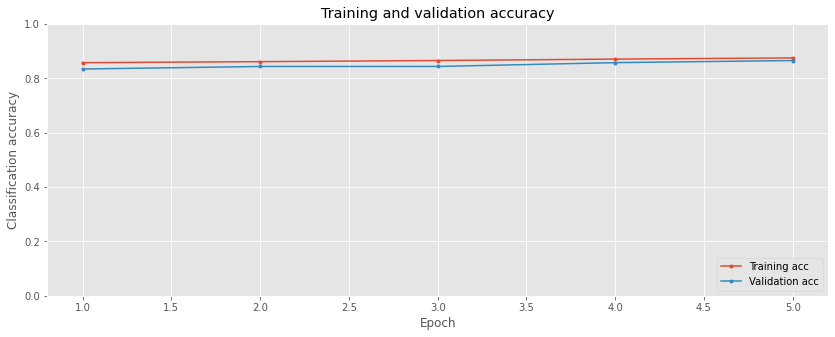

In [0]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [0]:
# Retrieve the embedding layer's weights from the trained model

weights = model2.layers[1].get_weights()[0]

In [0]:
%cd /content/drive/My Drive/DL_DATASet/

/content/drive/My Drive/DL_DATASet


In [0]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

#out_v = io.open(path.join('content/drive/My Drive/ DL_DATASet/', 'vecs.tsv'), 'w', encoding='utf-8')
#out_m = io.open(path.join('content/drive/My Drive/ DL_DATASet/', 'meta.tsv'), 'w', encoding='utf-8')

out_v = io.open(('vecs.tsv'),'w',encoding='utf-8')
out_m=io.open(('meta.tsv'),'w',encoding='utf-8')
k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [0]:
# Create a SimpleRNN layer and test it

simplernn_layer = tf.keras.layers.SimpleRNN(units=16)

In [0]:
# Note that only the final cell output is returned
# RNN input dim( batch, seq.length, features)
seq= tf.constant([[ [1.,1.,3.],[2.,8.,7.],[56.,156.,9.],[33.,756.,90.] ]])
seq

<tf.Tensor: shape=(1, 4, 3), dtype=float32, numpy=
array([[[  1.,   1.,   3.],
        [  2.,   8.,   7.],
        [ 56., 156.,   9.],
        [ 33., 756.,  90.]]], dtype=float32)>

In [0]:
layer_output=simplernn_layer(seq)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[ 1.       , -1.       , -1.       , -1.       , -1.       ,
         1.       ,  1.       ,  1.       , -1.       , -1.       ,
        -1.       , -1.       ,  1.       , -0.9988768, -1.       ,
        -1.       ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [0]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [0]:
# Load the dataset
(x_train, y_train),(x_test,y_test)= get_and_pad_imdb_dataset(maxlen= 250)



17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [0]:
# Get the word index using get_imdb_word_index()

imdb_word_index= get_imdb_word_index()

1646592/1641221 [==============================] - 0s 0us/step


#### Create a recurrent neural network model

In [0]:
# Get the maximum index value
max_index_value = max(imdb_word_index.values() )
max_index_value
embedding_dim = 16 


In [0]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

model = tf.keras.Sequential([
                     tf.keras.layers.Embedding(input_dim= max_index_value+1 , output_dim=embedding_dim,mask_zero=True),
                     tf.keras.layers.LSTM(units=16),
                     tf.keras.layers.Dense(units=1,activation='sigmoid')])



#### Compile and fit the model

In [0]:
# Compile the model with binary cross-entropy loss
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer= 'adam')


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
lstm_4 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 162,145
Trainable params: 162,145
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit the model and save its training history
history = model.fit(x_train,y_train,epochs= 3, batch_size=32)




Epoch 1/3
782/782 [==============================] - 393s 503ms/step - loss: 0.4078 - accuracy: 0.8131
Epoch 2/3
782/782 [==============================] - 392s 501ms/step - loss: 0.2301 - accuracy: 0.9142
Epoch 3/3
782/782 [==============================] - 392s 502ms/step - loss: 0.1765 - accuracy: 0.9372


#### Plot learning curves

In [0]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: ignored

#### Make predictions with the model

In [0]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index= { value:key for key, value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index>2]

['ignore',
 'the',
 'bad',
 'reviews',
 'on',
 'here',
 'this',
 'film',
 'is',
 'awesome',
 'just',
 'before',
 'dawn',
 'is',
 'a',
 'great',
 'example',
 'of',
 'what',
 'can',
 'be',
 'done',
 'in',
 'a',
 'film',
 'with',
 'a',
 'minimal',
 'budget',
 'if',
 'you',
 'have',
 'a',
 'dedicated',
 'crew',
 'decent',
 'script',
 'and',
 'a',
 'cool',
 'idea',
 'for',
 'a',
 'film',
 "it's",
 'a',
 'hell',
 'of',
 'a',
 'lot',
 'of',
 'fun',
 'br',
 'br',
 'i',
 'enjoyed',
 'it',
 'a',
 'lot',
 'more',
 'than',
 'most',
 'other',
 "80's",
 'slashers',
 'because',
 'the',
 'killer',
 'is',
 'so',
 'unique',
 'wrong',
 'turn',
 'ripped',
 'this',
 'movie',
 'off',
 'something',
 'fierce',
 "there's",
 'plenty',
 'of',
 'blood',
 'and',
 'scares',
 'my',
 'girlfriend',
 'was',
 'freaked',
 'out',
 'and',
 'she',
 'watches',
 'almost',
 'everything',
 'with',
 'me',
 'and',
 "doesn't",
 "it's",
 'got',
 'that',
 'creepiness',
 'to',
 'it',
 'br',
 'br',
 "i'd",
 'say',
 'that',
 'just',
 '

In [0]:
# Get the model prediction using model.predict()
model.predict(x_test[None,0,:])


array([[0.98772544]], dtype=float32)

In [0]:
x_test[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1, 2753,    3,   77,  856,   22,
        132,   13,   21,    8, 1189,   42,  158, 3421,    8,    5,   86,
        462,    6,   50,   69,   29,  223,   10,    5,   21,   18,    5,
       3721,  351,   47,   24,   27,    5, 4326, 10

In [0]:
[inv_imdb_word_index[index] for index in x_test[0] if index>2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [0]:
# Get the corresponding label
y_test[0]


1

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [0]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [0]:
# Load the dataset

(x_train,y_train),(x_test,y_test)=get_and_pad_imdb_dataset(num_words=1000,maxlen=250)
                                                           

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [0]:
# Get the word index using get_imdb_word_index()
imdb_word_index= get_imdb_word_index(num_words= 5000)


1646592/1641221 [==============================] - 0s 0us/step


#### Build stacked and bidirectional recurrent models

In [0]:
# Get the maximum index value and specify an embedding dimension
max_index_value=max(imdb_word_index.values())
embedding_dim=16
print(max_index_value)


In [0]:
# Using Sequential, build a stacked LSTM model via return_sequences=True
model= tf.keras.Sequential([
                            tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim,mask_zero=True),
                            tf.keras.layers.LSTM(units=32,return_sequences=True),   # return_Seq=True will make layer to return 3 dim output
                            tf.keras.layers.LSTM(units=32,return_sequences=False),
                            tf.keras.layers.Dense(units=1,activation='sigmoid')


])


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          80016     
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 32)          6272      
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 94,641
Trainable params: 94,641
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model1= tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim,mask_zero=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8),merge_mode='sum',backward_layer=tf.keras.layers.GRU(units=8,go_backwards=True)),
                             tf.keras.layers.Dense(units=1,activation='sigmoid')

])

In [0]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          80016     
_________________________________________________________________
bidirectional (Bidirectional (None, 8)                 1424      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 81,449
Trainable params: 81,449
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer
model2= tf.keras.Sequential([tf.keras.layers.Embedding(input_dim=max_index_value+1, output_dim=embedding_dim,mask_zero=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8,return_sequences=True),merge_mode='concat'),
                             tf.keras.layers.GRU(units=8,return_sequences=False),
                             tf.keras.layers.Dense(units=1,activation='sigmoid')
                             ])


In [0]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          80016     
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 16)          1600      
_________________________________________________________________
gru_1 (GRU)                  (None, 8)                 624       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 82,249
Trainable params: 82,249
Non-trainable params: 0
_________________________________________________________________


#### Compile and fit the model

In [0]:
# Compile the model

model2.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [0]:
# Train the model, saving its history

history= model2.fit(x_train,y_train,epochs=3,batch_size=32)

Epoch 1/3
782/782 [==============================] - 1737s 2s/step - loss: 0.4266 - accuracy: 0.7922
Epoch 2/3
782/782 [==============================] - 1738s 2s/step - loss: 0.3095 - accuracy: 0.8698
Epoch 3/3
111/782 [===>..........................] - ETA: 24:26 - loss: 0.2741 - accuracy: 0.8925

In [0]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);